# Import software libraries

In [297]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler


from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore')

# Load and preview the data

In [298]:
df=pd.read_pickle('./users_data_final.pickle')
df.head()

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


# Check the shape of the data

In [299]:
df.shape

(45179, 33)

# Check the data types

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null  int6

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

<Axes: xlabel='term_deposit', ylabel='Count'>

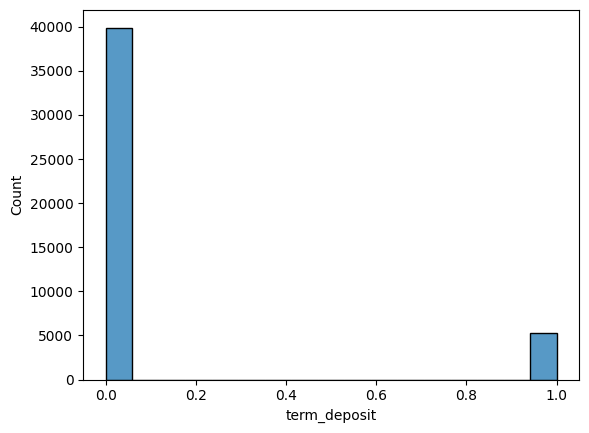

In [301]:
sns.histplot(data=df,x='term_deposit')


### The distribution is skewed to the false 

# Apply oversampling or SMOTE to the target label

<Axes: xlabel='term_deposit', ylabel='Count'>

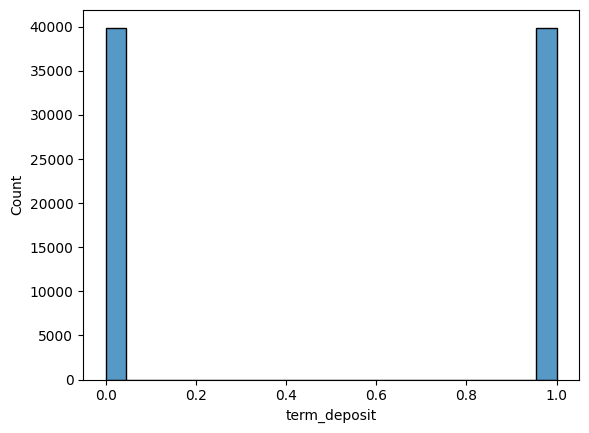

In [302]:
df.drop(columns='user_id',inplace=True)

X = df.loc[:,df.columns != 'term_deposit']
y = df.loc[:,df.columns  == 'term_deposit']

smote = SMOTE(random_state = 1) 
X, y = smote.fit_resample(X, y)
frames = [X, y]
df = pd.concat(frames)
sns.histplot(data=y,x="term_deposit")

In [303]:
df

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,3.0,2143.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,1.0,-1.0,0.0,0.0,0.0,0.0,4.0,8.0,NaN
1,0.0,1369.42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,1.0,-1.0,0.0,1.0,0.0,1.0,2.0,7.0,NaN
2,2.0,2.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,76.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,6.0,NaN
3,0.0,1369.42,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,92.0,1.0,-1.0,0.0,0.0,1.0,0.0,3.0,6.0,NaN
4,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,198.0,1.0,-1.0,0.0,0.0,0.0,1.0,1.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [304]:
y['term_deposit']

0        False
1        False
2        False
3        False
4        False
         ...  
79783     True
79784     True
79785     True
79786     True
79787     True
Name: term_deposit, Length: 79788, dtype: bool

In [305]:


df.drop(columns='term_deposit',inplace=True)
df['term_deposit'] = y['term_deposit']


In [306]:
df['term_deposit'].unique()

df


,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,3.0,2143.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,1.0,-1.0,0.0,0.0,0.0,0.0,4.0,8.0,False
1,0.0,1369.42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,1.0,-1.0,0.0,1.0,0.0,1.0,2.0,7.0,False
2,2.0,2.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,76.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,6.0,False
3,0.0,1369.42,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,92.0,1.0,-1.0,0.0,0.0,1.0,0.0,3.0,6.0,False
4,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,198.0,1.0,-1.0,0.0,0.0,0.0,1.0,1.0,8.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
79786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


# Normalize the data

In [307]:
scaler = MinMaxScaler().fit(X)

scaled_data = scaler.transform(X)

scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.150000,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.636364
1,0.000000,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030704,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.333333,0.545455
2,0.100000,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.454545
3,0.000000,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.018707,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.500000,0.454545
4,0.050000,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.040260,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.166667,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,0.107743,0.076938,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.089264,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.833333,0.818182
79784,0.232385,0.134778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.317609,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.727273
79785,0.100000,0.076680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.101057,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
79786,0.158226,0.090736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064660,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.909091


# Standardlize the data

In [313]:
scaler = StandardScaler().fit(X)
standarizes_data = scaler.fit_transform(X)
standarizes_data = pd.DataFrame(standarizes_data)
standarizes_data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.028827,0.229690,2.420854,-0.344530,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.337142,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,1.805049,0.536681
1,-0.861438,-0.046808,-0.413077,2.902503,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.655599,-0.523842,-0.489062,-0.340673,2.111004,-0.284204,1.888273,-0.013906,0.223344
2,-0.267928,-0.535561,-0.413077,-0.344530,7.163798,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.872729,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,-0.923384,-0.089994
3,-0.861438,-0.046808,-0.413077,-0.344530,-0.139591,2.571928,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.826408,-0.523842,-0.489062,-0.340673,-0.473708,3.518595,-0.529584,0.895571,-0.089994
4,-0.564683,-0.535919,-0.413077,-0.344530,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.519531,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,1.888273,-0.923384,0.536681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,-0.221970,-0.373501,-0.413077,-0.344530,-0.139591,-0.388813,5.311843,-0.276717,-0.239489,-0.143643,...,-0.203273,0.178180,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,2.714527,1.163357
79784,0.517790,1.903596,-0.413077,-0.344530,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,3.429336,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,-0.923384,0.850019
79785,-0.267928,-0.383655,-0.413077,-0.344530,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,0.346093,-0.134155,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,-1.832862,-1.656683
79786,0.077650,0.169715,-0.413077,-0.344530,-0.139591,-0.388813,-0.188259,-0.276717,-0.239489,-0.143643,...,-0.203273,-0.172123,-0.523842,-0.489062,-0.340673,-0.473708,-0.284204,-0.529584,1.805049,1.476695


# Plot the PCA

In [309]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

pca = PCA()
pca.fit(scaled_df)

pd.Series(pca.explained_variance_ratio_) 


0     0.070172
1     0.063317
2     0.053266
3     0.049417
4     0.045762
5     0.041957
6     0.038357
7     0.037247
8     0.036473
9     0.035353
10    0.034332
11    0.033797
12    0.033352
13    0.033191
14    0.032915
15    0.031903
16    0.031605
17    0.029819
18    0.029758
19    0.028953
20    0.027083
21    0.026893
22    0.025495
23    0.023326
24    0.022721
25    0.019824
26    0.016955
27    0.015925
28    0.014609
29    0.012288
30    0.003935
dtype: float64

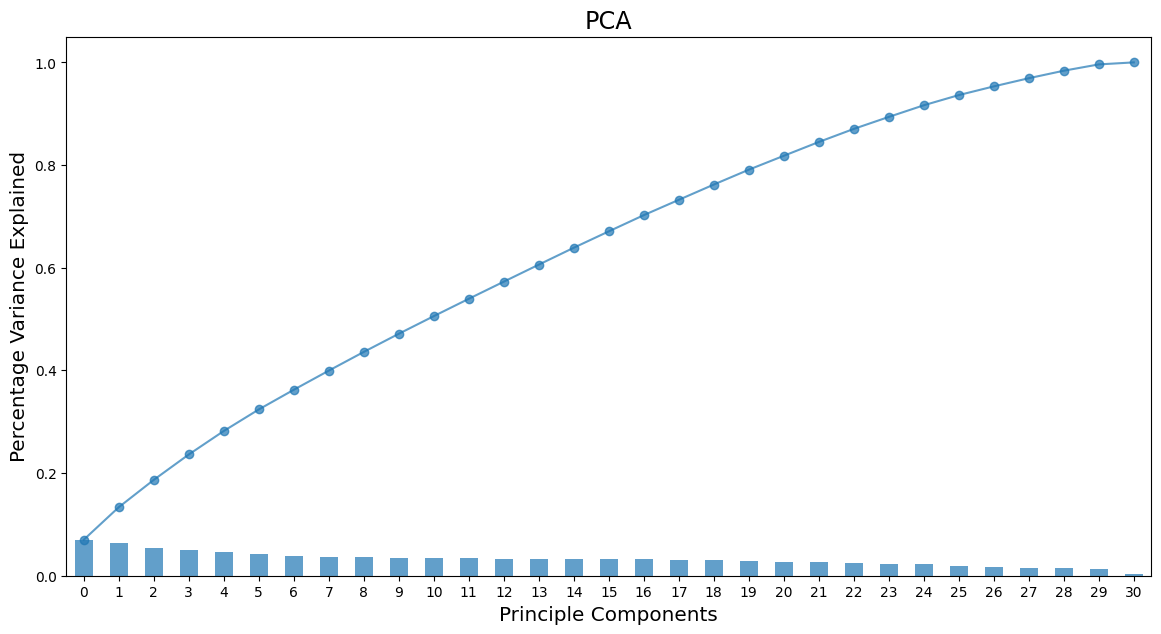

In [311]:
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)

total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("PCA", fontsize="xx-large")
plt.show();